https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html  
https://www.kaggle.com/code/tanulsingh077/prostate-cancer-in-depth-understanding-eda-model/notebook  
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [376]:
%reload_ext autoreload
%autoreload 2

import math
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append('../utils')

from ggdrive  import download_file_from_google_drive
from ext_func import diff_lists
from plotting import (
    ordered_countplot_facet_grid, 
    perc_barplot_facet_grid, 
    distplot_count_facet_grid,
    distplot_percent_facet_grid,
    boxplot_facet_grid
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_style('whitegrid')

%matplotlib inline

# Domain Knowledge and Data  

- What kind of relations might be meaningful to search for?
- What statistical tests are applicable here?
- What kind of distances make sense in this domain?

In [32]:
data_home = pathlib.Path('data')
data_home.mkdir(exist_ok=True)

data_descr_file = data_home/'bank-additional-names.txt'
data_file = data_home/'bank-additional-full.csv'

download_file_from_google_drive(id='1g7dNIkaomwUwx7ALyz__o1FD9pH28u3i', dest=str(data_descr_file))
download_file_from_google_drive(id='1skgN4HNr1snDiyhb-dotzPDR7YrebLuQ', dest=str(data_file))

In [43]:
with open(str(data_descr_file),'r', encoding='utf8') as f:
    print(f.read())
    
data = pd.read_csv(data_file, sep=';')

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [207]:
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,observation_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41183
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41184
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41185
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41186


# Part 1: EDA  
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## 1.1 Univariate analysis  
1. consider features separately  
2. their distributions
3. descriptive statistics
4. anomalies
5. omissions
6. etc.

In [270]:
print(data.info())
print()
print(data.nunique())
print()
display(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,observation_id
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.00000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN,20593.50000
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN,11890.09578
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.00000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN,10296.75000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,20593.50000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,30890.25000


In [208]:
if data.isna().values.any():
    print(data.isna().sum())
    data.loc[data.isna().any(axis=1)].head()
else:
    print('No features with NaNs')

No features with NaNs


### 1.1.1 INTERPRETATION 
1. There are only 5 unique day_of_week. Possibly it is because bank doesn't work on Saturday and Sunday.
2. Only 10 months.
3. Measurement scales are very diverse in types and ranges: categorical (both nominals and ordinals) and numerical (discrete and continuos).  
4. All objects have defined features, so data is handled and diligently written down. However there are features with missing values represented as 'unknown' or some other constant like '999.0' signs.
5. No features with NaNs.
6. There is notably a large difference between 75th %tile and max values of predictors **age**, **duration**, **campaign**, **previous**. Thus it suggests that possibly there are extreme values-outliers in the data set.
7. Values of numeric features are from small sets f cardinality much less then the observations count. Only **duration** takes 1544 unique values other features have 10-100 times less cardinality.  
At the same time all numeric features are from completely different scales:  
  - **age** - [0, 100+]
  - **duration** - >=0, hard to imagine a call more than 1h
  - **campaign** - seems like number of contacts per client are limited let's say to a 100+.
  - similar for others

Group features into types and preprocess the data for ease to visualize. 

In [278]:
# Probably it's better to use pd.dtype to separate features
numeric_features  = sorted(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
nominal_features  = sorted(['job', 'marital', 'contact', 'poutcome'])
ordinals_features = sorted(['education', 'month', 'day_of_week'])
boolean_features  = sorted(['default', 'housing', 'loan', 'y'])
target_feature    = ['y']
not_to_consider   = ['duration']  # we do not know it before a call

data['observation_id'] = data.index

categorical_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=(nominal_features+ordinals_features+boolean_features))
categorical_long_perc_data = (
    categorical_long_data
    .groupby(['variable'])['value']
    .value_counts(normalize=True)
    .reset_index(name='percentage')
)
categorical_long_perc_data['percentage'] = (categorical_long_perc_data['percentage']*100).round(2)

categorical_long_data = categorical_long_data.merge(categorical_long_perc_data, on=['variable', 'value'], how='inner')

numeric_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=numeric_features)

Let's see statistics for numeric features.

In [220]:
display(data.groupby(target_feature)[numeric_features].describe(percentiles=[.5, .95]))

age                                               campaign                                          cons.conf.idx                                              cons.price.idx                                                      duration                                                      emp.var.rate                                         euribor3m                                                 nr.employed                                                            pdays                                                   previous                                        
       count       mean        std   min   50%   95%   max    count      mean       std  min  50%  95%   max         count       mean       std   min   50%   95%   max          count       mean       std     min     50%     95%     max    count        mean         std   min    50%     95%     max        count      mean       std  min  50%  95%  max     count      mean       std    min    50%    95%    max       count         mean        std     min     50%     95%     max    count        mean         std  min    50%    95%    max    count      mean       std  min  50%  95%  max
y                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
no   36548.0  39.911185   9.898132  17.0  38.0  57.0  95.0  36548.0  2.633085  2.873438  1.0  2.0  7.0  56.0       36548.0 -40.593097  4.391155 -50.8 -41.8 -36.1 -26.9        36548.0  93.603757  0.558993  92.201  93.918  94.465  94.767  36548.0  220.844807  207.096293   0.0  163.5   595.0  4918.0      36548.0  0.248875  1.482932 -3.4  1.1  1.4  1.4   36548.0  3.811491  1.638187  0.634  4.857  4.966  5.045     36548.0  5176.166600  64.571979  4963.6  5195.8  5228.1  5228.1  36548.0  984.113878  120.656868  0.0  999.0  999.0  999.0  36548.0  0.132374  0.409199  0.0  0.0  1.0  7.0
yes   4640.0  40.913147  13.837476  17.0  37.0  69.0  98.0   4640.0  2.051724  1.666245  1.0  2.0  5.0  23.0        4640.0 -39.789784  6.139668 -50.8 -40.4 -29.8 -26.9         4640.0  93.354386  0.676644  92.201  93.200  94.465  94.767   4640.0  553.191164  401.171871  37.0  449.0  1311.0  4199.0       4640.0 -1.233448  1.623626 -3.4 -1.8  1.4  1.4    4640.0  2.123135  1.742598  0.634  1.266  4.964  5.045      4640.0  5095.115991  87.572641  4963.6  5099.1  5228.1  5228.1   4640.0  792.035560  403.407181  0.0  999.0  999.0  999.0   4640.0  0.492672  0.860344  0.0  0.0  2.0  6.0

Try plotting histograms for numeric features.

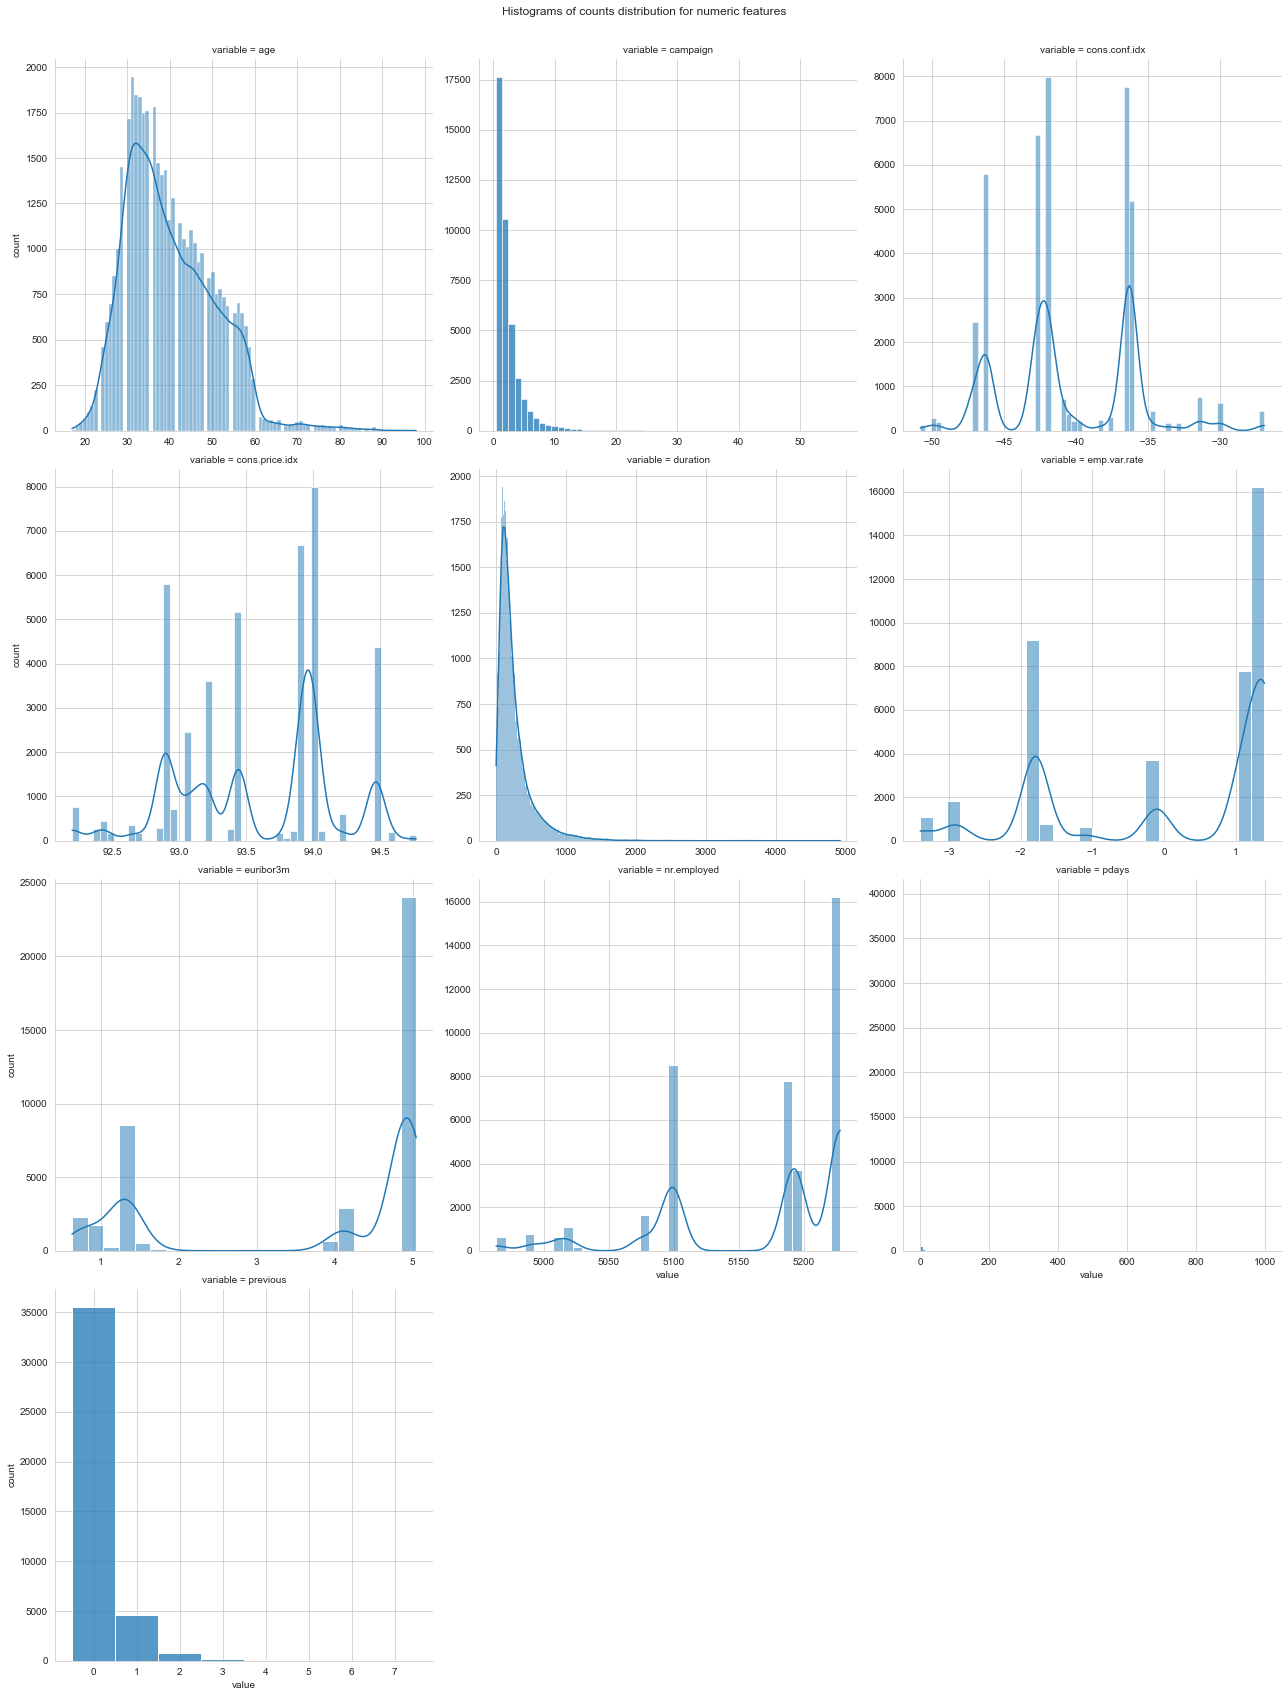

In [379]:
distplot_count_facet_grid(
    title='Histograms of counts distribution for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    feature_plot_kws={
        'campaign': dict(discrete=True), 
        'pdays': dict(discrete=True), 
        'previous': dict(discrete=True)
    },
    facet_kws=dict(height=6, col_wrap=3, sharex=False, sharey=False, margin_titles=True)
)

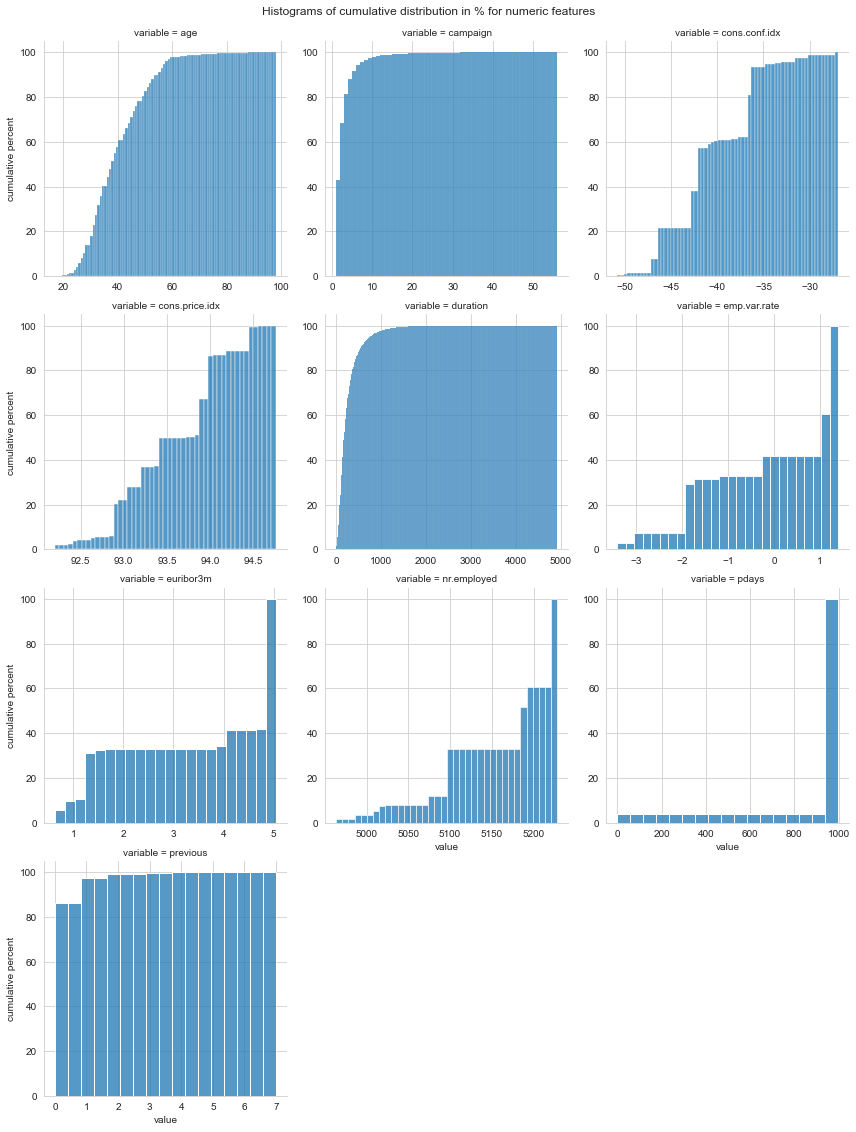

In [382]:
distplot_percent_facet_grid(
    title='Histograms of cumulative distribution in % for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    feature_plot_kws={k: dict(cumulative=True, fill=True, stat='percent') for k in numeric_features},
    facet_kws=dict(height=4, col_wrap=3, sharex=False, sharey=False)
)

Now let's try describing IQR and see feature values heads and tails

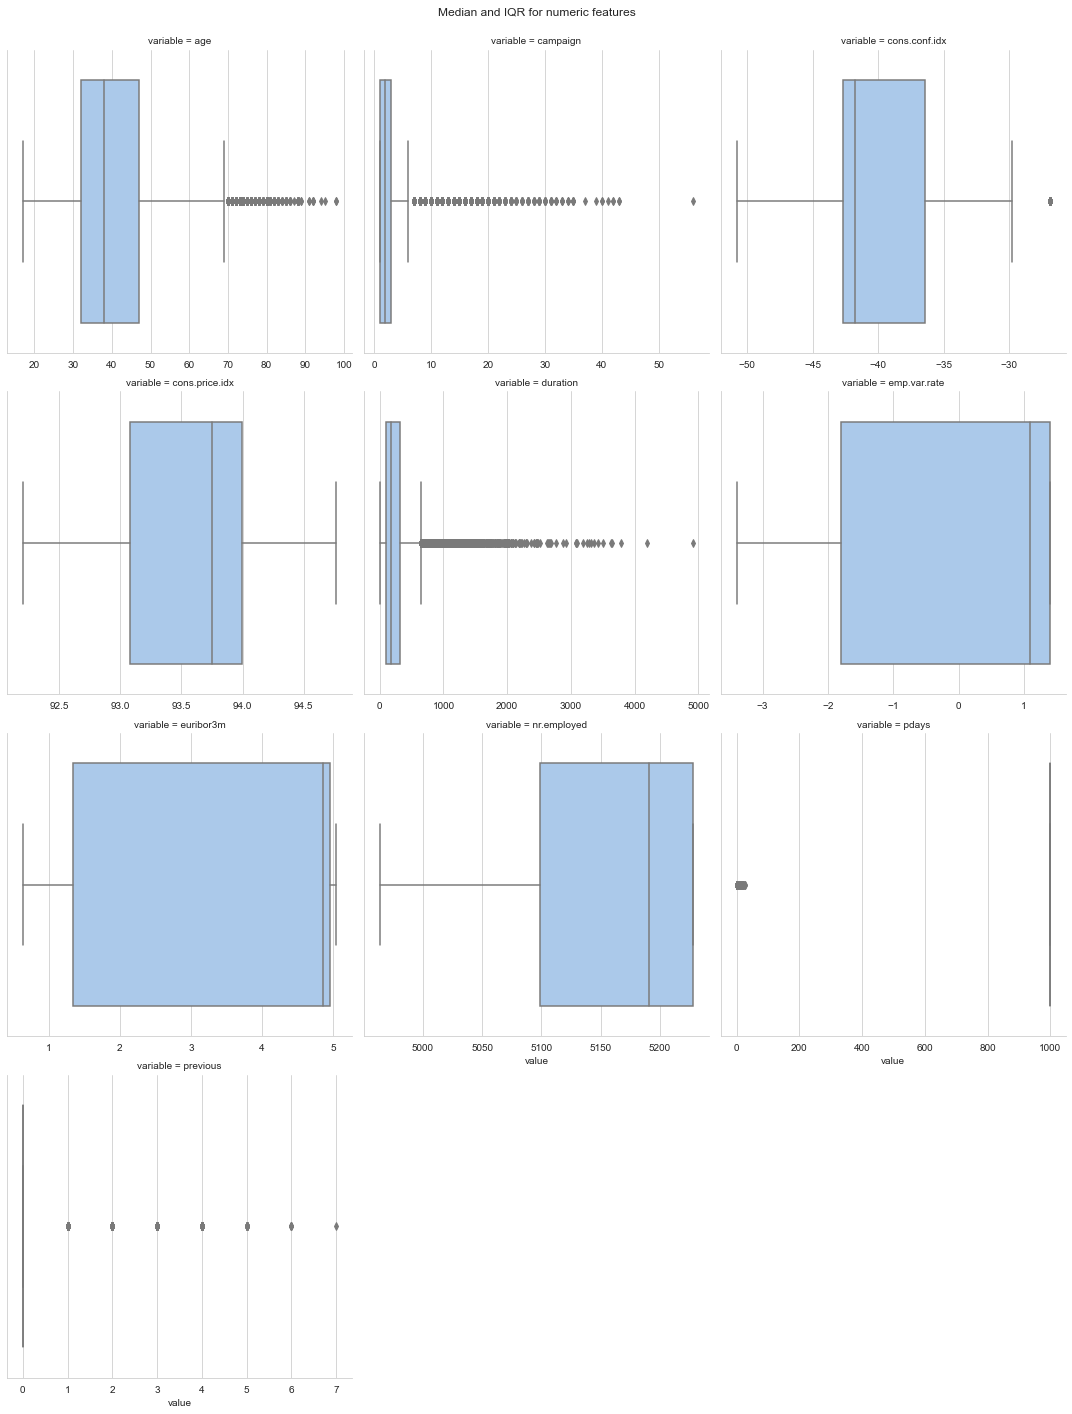

In [384]:
boxplot_facet_grid(
    title='Median and IQR for numeric features',
    data=numeric_long_data,
    plots_for='variable',
    values_col='value',
    facet_kws=dict(height=5, col_wrap=3, sharex=False, sharey=False)
)

To sum-up the box-and-whisker plots above let's calc some precise values for feautures values groups which make up the biggest part in the features under consideration.  

In [289]:
print(len(numeric_long_data[(numeric_long_data.variable=='age') & (numeric_long_data.value>=20) & (numeric_long_data.value<=60)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='campaign') & (numeric_long_data.value>0) & (numeric_long_data.value<=10)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='pdays') & (numeric_long_data.value==999)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='previous') & (numeric_long_data.value==0)]) / len(data))
print(len(numeric_long_data[(numeric_long_data.variable=='duration') & (numeric_long_data.value>0) & (numeric_long_data.value<=1000)]) / len(data))

0.9760852675536564
0.9789016218316015
0.9632174419733903
0.8634310964358551
0.976692240458386


Let's see some stats for categorical values grouped into target classes.

In [214]:
display(data.groupby(target_feature)[(nominal_features+ordinals_features+boolean_features)].describe())

contact                            job                      marital                        poutcome                            day_of_week                   education                                   month                    default                   housing                      loan                        y                   
      count unique       top   freq  count unique     top  freq   count unique      top   freq    count unique          top   freq       count unique  top  freq     count unique                top   freq  count unique  top   freq   count unique top   freq   count unique  top   freq  count unique top   freq  count unique  top   freq
y                                                                                                                                                                                                                                                                                                                                            
no    36548      2  cellular  22291  36548     12  admin.  9070   36548      4  married  22396    36548      3  nonexistent  32422       36548      5  mon  7667     36548      8  university.degree  10498  36548     10  may  12883   36548      3  no  28391   36548      3  yes  19069  36548      3  no  30100  36548      1   no  36548
yes    4640      2  cellular   3853   4640     12  admin.  1352    4640      4  married   2532     4640      3  nonexistent   3141        4640      5  thu  1045      4640      8  university.degree   1670   4640     10  may    886    4640      2  no   4197    4640      3  yes   2507   4640      3  no   3850   4640      1  yes   4640

Let's see some counts stats for categorical values.

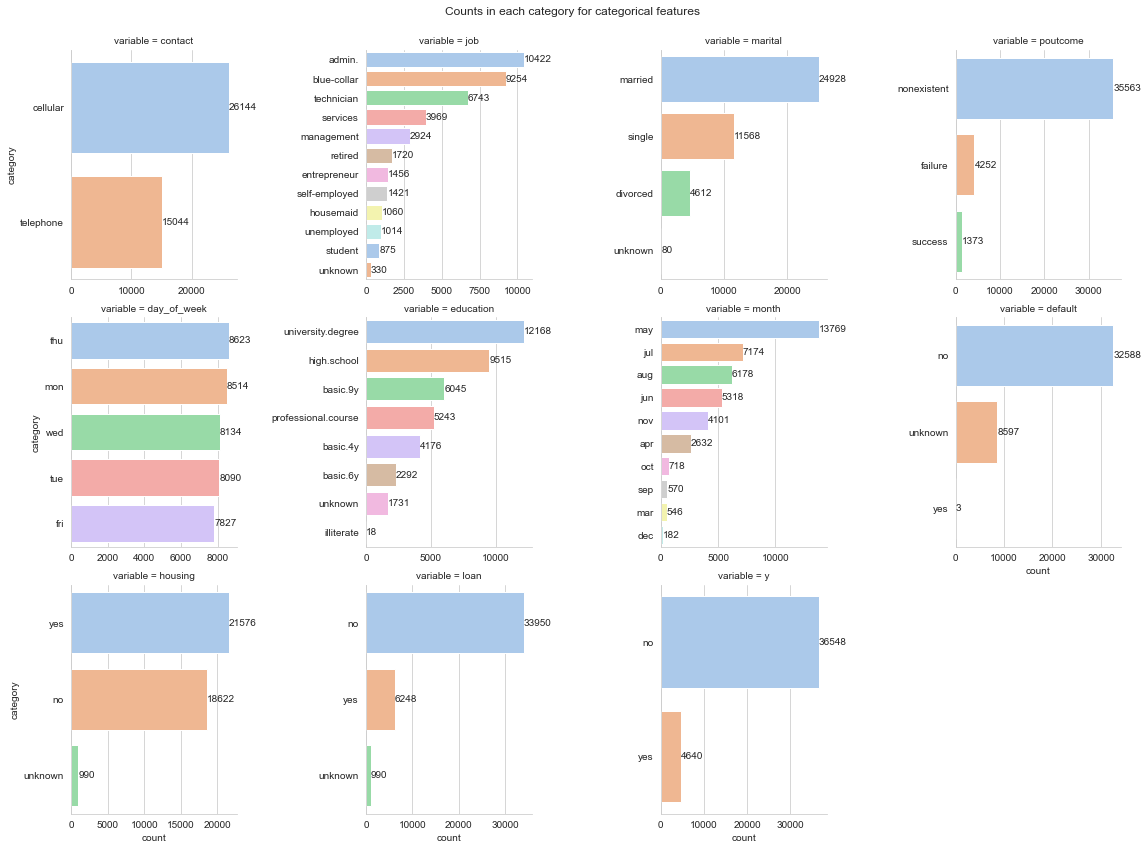

In [377]:
ordered_countplot_facet_grid(
    title='Counts in each category for categorical features',
    data=categorical_long_data, 
    plots_for='variable',
    values_col='value',
    facet_kws=dict(height=4, col_wrap=4, sharex=False, sharey=False)
)

Same as above but in percentage figures.

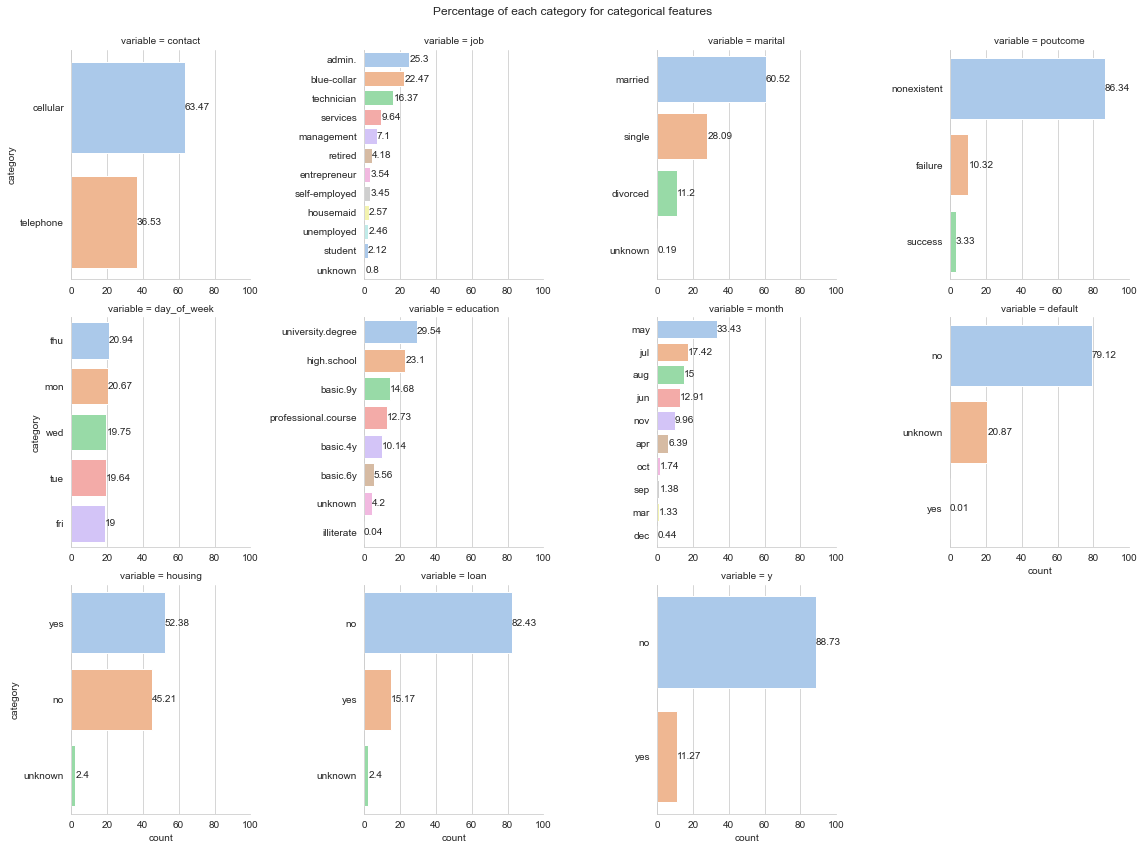

In [378]:
perc_barplot_facet_grid(
    title='Percentage of each category for categorical features',
    data=categorical_long_data, 
    plots_for='variable',
    x_col='value',
    y_col='percentage',
    facet_kws=dict(height=4, col_wrap=4, sharex=False, sharey=False)
)

Let's see the same as just above but in different form

TypeError: 'AxesSubplot' object is not subscriptable

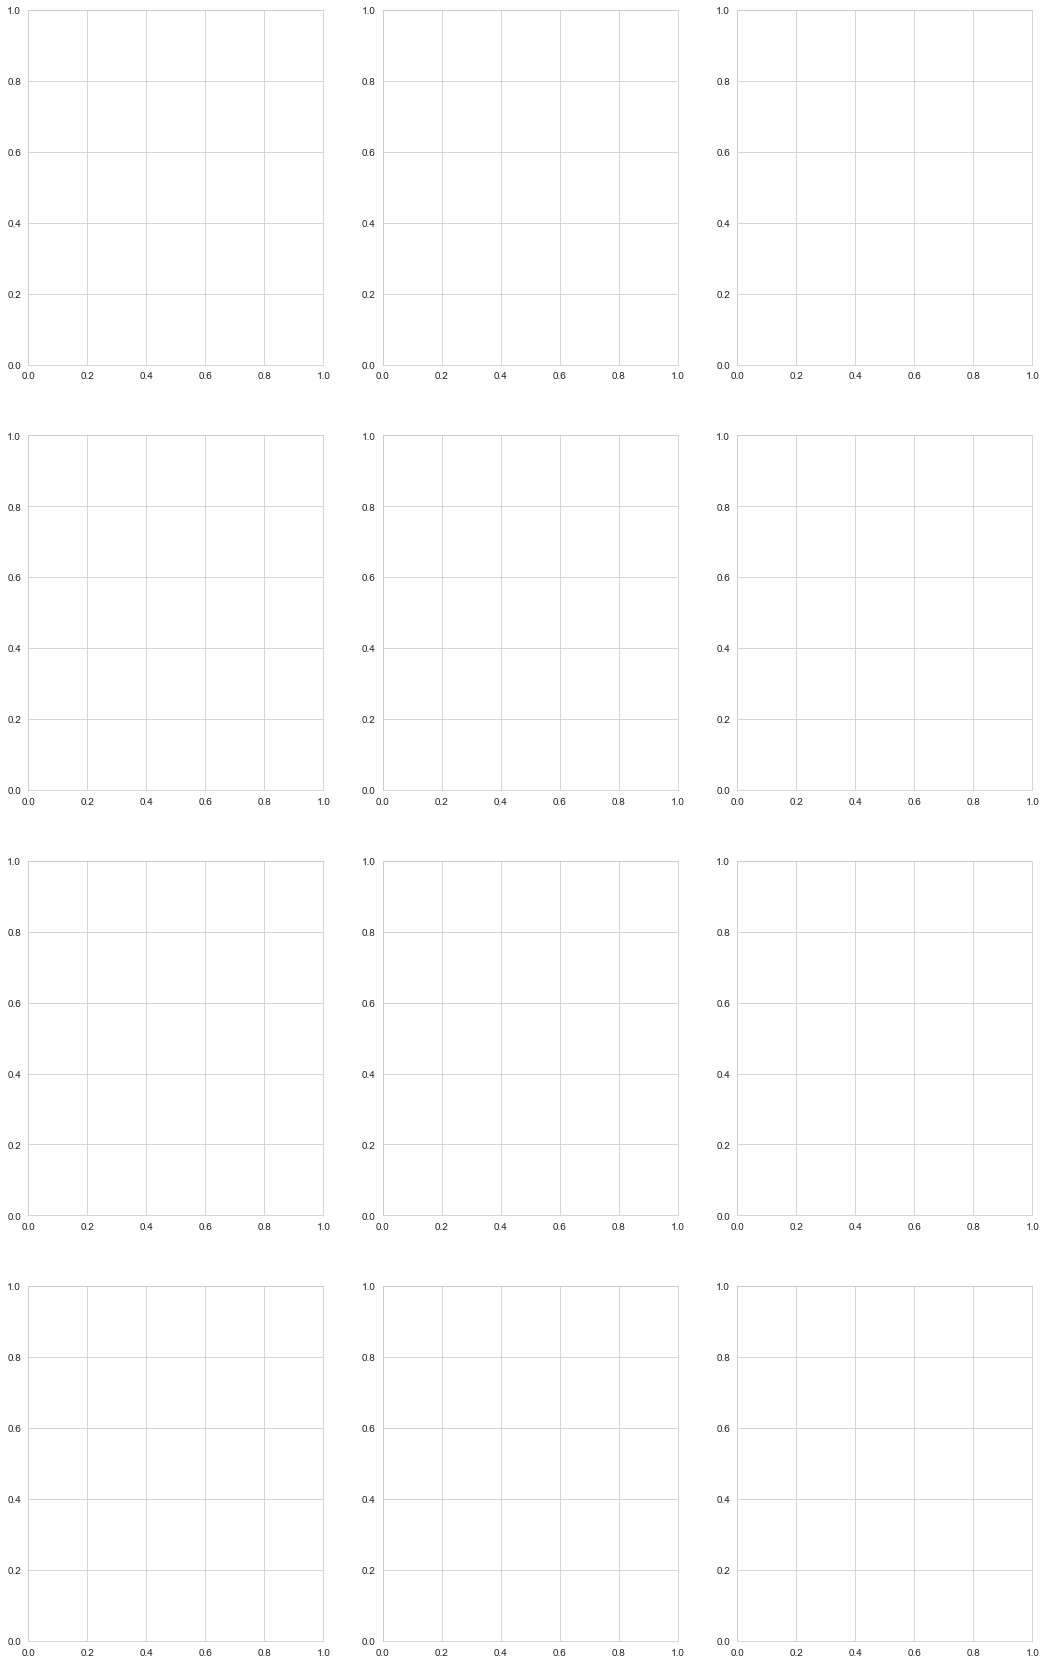

In [392]:
# ToDo move into plotting.py
cat_feat_subset = nominal_features+ordinals_features+boolean_features
fig, axes = plt.subplots(math.ceil(len(cat_feat_subset)/3), 3, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i in range(len(axes)-len(cat_feat_subset)):
    fig.delaxes(axes[3][2])

for i, c in enumerate(cat_feat_subset):
    data[c].value_counts()[::-1].plot(
        kind='pie',
        ax=axes[i],
        title=c,
        autopct='%.1f%%',
        fontsize=12,
        colormap='Pastel2_r'
    )
    
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 1.1 INTERPRETATION  
1. Missing values are in features **job**, **marital**, **education**, **default**, **housing**, **loan**.
2. Vary few number of clients who subscribed a term deposit, only **11.2%**, target value y=1.
3. High amount of missing values **~21%** inside **default**.
4. **63%** of the clients were contacted using 'cellular' type in both groups.
5. **96%** of the clients were not contacted before a call (we can explore it further to see if there is a connection between contacted clients and **y**).
6. **86%** of the clients were not contacted previously before current campaign (we can explore it further to see if there is a connection between contacted clients and **y**).
7. **98%** of the clients were contacted from 1 to 10 times.
8. **98%** of the clients of age >= 20 and <= 60. Which makes sense such age groups still work, not retired, and might be interested in term deposit. Possibly, clients above 60s could be considered as "outliers" and dropped. See its relation to **y**.
9. It's hard to say something based on social and economic context attributes. But I feel like it naturally should be a relation to a target. The context values are from dense small ranges, may be there is a relation like "more ... most likely y=1".
10. There are gaps in **age** groups evengly distributed among 10s of ages.
11. A lot of management and technician clients.
12. Most clients are married.
13. Most clients are not defaulted in past.
14. More than 50% o the clients have taken housing loan.
15. Most of the clients were last contacted in the month of May.

## 1.2 Multivariate analysis 
1. consider features in pairs
2. try to introduce new features to consider their relationship with other features
3. etc. 

Bin clients into age groups by 10s. To see what are the relations between each group and other features.

In [350]:
data['age_under20s'] = data['age'] < 20
data['age_20s'] = (data['age'] >= 20) & (data['age'] < 30)
data['age_30s'] = (data['age'] >= 30) & (data['age'] < 40)
data['age_40s'] = (data['age'] >= 40) & (data['age'] < 50)
data['age_50s'] = (data['age'] >= 50) & (data['age'] < 60)
data['age_60s'] = (data['age'] >= 60) & (data['age'] < 70)
data['age_70s'] = (data['age'] >= 70) & (data['age'] < 80)
data['age_above80s'] = data['age'] >= 80

In [363]:
# Super slow!!
# How to make it bigger?
# ToDo move into plotting.py
g = sns.PairGrid(
    data, 
    vars=diff_lists(numeric_features, not_to_consider), 
    hue=target_feature[0], 
    height=6
)

g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot)
g.add_legend()


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E3E7A18E58> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E3E7A381F8> (for post_execute):


KeyboardInterrupt: 

TODO
1. new feature for age groups
2. new feature for not contacted (pdays = 999)
3. pair plots
4. explore dependencies between contacting and target
5. binning for contact number
6. binning for days?
7. Adjust boxplot whiskers interval to detect outliers

# Q
1. How best visualize billions of points and tens of features? E.g. for big data.
2. Do I really need plots for all pairs?
3. What can be done better?
4. What can be done on "anomalies" detection?
5. 